In [3]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def print_means(df, evals):
    mus = ["0.4", "0.5", "0.6"]
    for _eval in evals:
            for mu in mus:
                for algo in df.algo.unique():
                    algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
                    avg = algo_rows["modularity - algo"].mean()
                    print(f"avg for: {algo}, {mu}, {_eval}:\t {avg}")
    return

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        sns_plot = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()



evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]



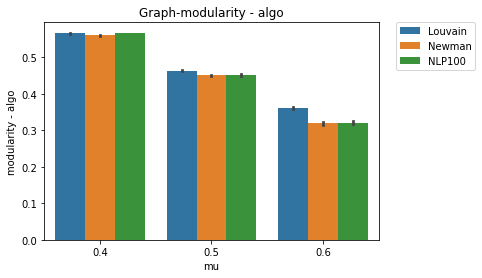

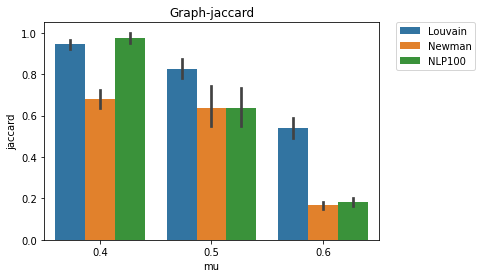

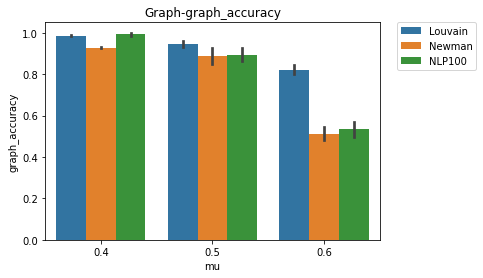

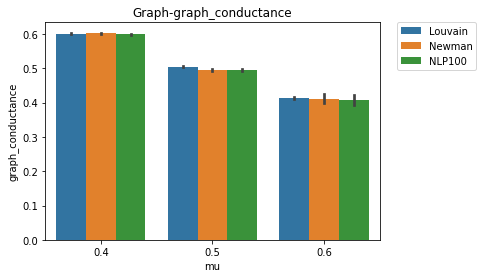

avg for: Louvain, 0.4, modularity - algo:	 0.5658067022546207
avg for: Newman, 0.4, modularity - algo:	 0.5597839231306548
avg for: NLP100, 0.4, modularity - algo:	 0.5658567375069163
avg for: Louvain, 0.5, modularity - algo:	 0.4635639057317583
avg for: Newman, 0.5, modularity - algo:	 0.4501453796094679
avg for: NLP100, 0.5, modularity - algo:	 0.45025597768465336
avg for: Louvain, 0.6, modularity - algo:	 0.35980074286609476
avg for: Newman, 0.6, modularity - algo:	 0.3186261068262154
avg for: NLP100, 0.6, modularity - algo:	 0.3204900605456128
avg for: Louvain, 0.4, jaccard:	 0.5658067022546207
avg for: Newman, 0.4, jaccard:	 0.5597839231306548
avg for: NLP100, 0.4, jaccard:	 0.5658567375069163
avg for: Louvain, 0.5, jaccard:	 0.4635639057317583
avg for: Newman, 0.5, jaccard:	 0.4501453796094679
avg for: NLP100, 0.5, jaccard:	 0.45025597768465336
avg for: Louvain, 0.6, jaccard:	 0.35980074286609476
avg for: Newman, 0.6, jaccard:	 0.3186261068262154
avg for: NLP100, 0.6, jaccard:	 0

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,split_method,lp,TimeLimit,time-sec,network,mu
0,Louvain,0.567002,0.567124,0.966485,0.599863,1.000,0.988939,34,33,NaN,NaN,None,None,random,None,600,0.129032,16-06-2022--12-22-26-1000_0.4_8,0.4
1,Newman,0.567002,0.561354,0.725167,0.599697,0.996,0.929264,34,29,NaN,NaN,None,None,random,None,600,0.755148,16-06-2022--12-22-26-1000_0.4_8,0.4
2,NLP100,0.567002,0.565573,0.948197,0.597929,0.996,0.984433,34,33,12.0,0.0,None,None,random,None,600,99.150105,16-06-2022--12-22-26-1000_0.4_8,0.4
3,Louvain,0.566140,0.564489,0.923572,0.601766,1.000,0.983362,31,30,NaN,NaN,None,None,random,None,600,0.139101,16-06-2022--12-20-50-1000_0.4_9,0.4
4,Newman,0.566140,0.558214,0.637447,0.603795,0.999,0.926359,31,26,NaN,NaN,None,None,random,None,600,0.516396,16-06-2022--12-20-50-1000_0.4_9,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Newman,0.362887,0.323355,0.201211,0.380766,0.789,0.566677,28,13,NaN,NaN,None,None,random,None,600,0.492629,16-06-2022--11-44-58-1000_0.6_8,0.6
62,NLP100,0.362887,0.323821,0.211602,0.372801,0.788,0.592166,28,15,4.0,4.0,None,None,random,None,600,80.356473,16-06-2022--11-44-58-1000_0.6_8,0.6
63,Louvain,0.363148,0.356635,0.447961,0.412795,0.947,0.794763,30,20,NaN,NaN,None,None,random,None,600,0.186459,16-06-2022--11-44-29-1000_0.6_9,0.6
64,Newman,0.363148,0.318911,0.148477,0.449468,0.841,0.502295,30,8,NaN,NaN,None,None,random,None,600,0.594318,16-06-2022--11-44-29-1000_0.6_9,0.6


In [5]:
input_folder = "16-06-2022--11-44-29-newman-random-split-10000"
df = run_visu(input_folder)
create_bar_graphs(df,evals)
print_means(df, evals)
display(df)

